Estudo Dados Airbnb Rotterdam

In [1]:
#Import das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
import inspect
import statistics
import pingouin as pg
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import datasets
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from dash import Dash, html, dcc, Input, Output
import plotly.express as px

#carregamento do Data_frame para o programa
listings_zipado_df=pd.read_csv('Ficheiros_airbnb_Rotterdam\listings zipado.csv')

In [2]:
#preparar os dados e tirar os caracteres especiais
listings_zipado_df['price'] = listings_zipado_df['price'].replace('[\$,]', '', regex=True).astype(float)

Separar avaliação do 'name' do DataFram listings_zipado

In [3]:
row = listings_zipado_df['name']

for index, palavra in enumerate(row):
    for indice, letra in enumerate(palavra):
        if letra =='★':
                if palavra[indice+1] != 'N' :
                    avaliacao = palavra[indice + 1: indice + 5]
                    listings_zipado_df.loc[index, 'avaliacao'] = float(avaliacao)
                    break;
                else:
                   # avaliacao = palavra[indice + 1: indice + 4]
                    avaliacao= float('NaN')
                    listings_zipado_df.loc[index, 'avaliacao'] = avaliacao
                    break;
        

Estatistica Descritiva (Calendar)

Analise ao preço - Qual é a média de preços dos aluguéis no Airbnb na cidade?


In [4]:
row, columm = listings_zipado_df.shape #mostra o número de linhas e o número de colunas
print(f"Ficheiro tem {row} Linhas e {columm} Colunas \n")

#Preço medio da estadia
price_mean = listings_zipado_df['price'].mean()
print(f"O preço médio: {price_mean:.2f}$")

#Preço medio da estadia
price_min = listings_zipado_df['price'].min()
print(f"O preço mais baixo: {price_min:.0f}$")

#Preço medio da estadia
price_max = listings_zipado_df['price'].max()
print(f"O preço mais alto: {price_max:.0f}$")

#Preço medio da estadia
price_mode = listings_zipado_df['price'].mode().values[0]
print(f"O preço mais aplicado: {price_mode:.0f}$")

#O coeficiente de assimetria da idade é: 7.212379118954113
# É positivo logo a cauda direita é mais longa comparada com a esquerda
price_assimetria = listings_zipado_df['price'].skew()
print(f"O coeficiente de assimetria da idade é: {price_assimetria:.2f}")

#Cortose - distribuição dos preços é mais concentrada perto da media
#Pouca diversidade de preços, com certos preços muito baixos
price_curtose = listings_zipado_df['price'].kurtosis()
print(f"O coeficiente de curtose da idade é: {price_curtose:.2f}")

Ficheiro tem 1040 Linhas e 76 Colunas 

O preço médio: 152.97$
O preço mais baixo: 20$
O preço mais alto: 2971$
O preço mais aplicado: 150$
O coeficiente de assimetria da idade é: 9.82
O coeficiente de curtose da idade é: 172.81


Estatistica Descritiva (Listings)

Valor medio Bairro - Quais são os bairros mais caros e mais baratos para alugar no Airbnb?


In [5]:
#Criar um DF agroupado por bairros com a media do Preço, é ordenado em ordem crescente (mais pequeno mais alto)

bairros_df = listings_zipado_df.groupby('neighbourhood_cleansed')['price'].mean()
bairros_df=bairros_df.sort_values(ascending=True)

#Automatização de quantidade de cidades para mostrar
lista_top=5

print(f"top 5 dos preços mais baixos:")
for bairro, preço in bairros_df.head(lista_top).items():
    print(f"\t{bairro} : {preço:.2f}$")


print(f"\ntop 5 dos preços mais altos:")
for bairro, preço in bairros_df[-1:-(lista_top+1):-1].items():
    print(f"\t{bairro} : {preço:.2f}$")


print("\n\n")

#preço medio de cada bairro ordenado
for bairro, preço in bairros_df.items():
    print(f"O preço médio em {bairro} é de: {preço:.2f}$")

top 5 dos preços mais baixos:
	Oud Mathenesse : 54.00$
	Bloemhof : 64.88$
	Carnisse : 74.82$
	Ommoord : 76.75$
	Prinsenland : 77.75$

top 5 dos preços mais altos:
	Hoogvliet Noord : 1295.00$
	Hoogvliet Zuid : 577.50$
	Kop van Zuid : 300.70$
	Nieuwe Werk : 250.20$
	Nesselande : 241.43$



O preço médio em Oud Mathenesse é de: 54.00$
O preço médio em Bloemhof é de: 64.88$
O preço médio em Carnisse é de: 74.82$
O preço médio em Ommoord é de: 76.75$
O preço médio em Prinsenland é de: 77.75$
O preço médio em Europoort é de: 80.00$
O preço médio em De Esch é de: 85.33$
O preço médio em Zuiderpark é de: 88.75$
O preço médio em Pernis é de: 90.00$
O preço médio em Oud Crooswijk é de: 93.33$
O preço médio em Tarwewijk é de: 94.59$
O preço médio em Schieveen é de: 96.00$
O preço médio em Oosterflank é de: 100.00$
O preço médio em Tussendijken é de: 102.85$
O preço médio em Het Lage Land é de: 104.00$
O preço médio em Bospolder é de: 104.25$
O preço médio em Lombardijen é de: 104.33$
O preço médi

Room-type - Quais são os tipos de propriedades mais comuns

In [6]:
listings_zipado_df=listings_zipado_df.drop('name', axis=1)
listings_zipado_df=listings_zipado_df.drop('description', axis=1)
listings_zipado_df=listings_zipado_df.drop('listing_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('scrape_id', axis=1)
listings_zipado_df=listings_zipado_df.drop('last_scraped', axis=1)
listings_zipado_df=listings_zipado_df.drop('source', axis=1)
listings_zipado_df=listings_zipado_df.drop('neighborhood_overview', axis=1)
listings_zipado_df=listings_zipado_df.drop('picture_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_id', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_name', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_since', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_location', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_about', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_is_superhost', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_acceptance_rate', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_thumbnail_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_picture_url', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_neighbourhood', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_verifications', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_has_profile_pic', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_identity_verified', axis=1)
listings_zipado_df=listings_zipado_df.drop('neighbourhood_group_cleansed', axis=1)
listings_zipado_df=listings_zipado_df.drop('bathrooms_text', axis=1)
listings_zipado_df=listings_zipado_df.drop('minimum_minimum_nights', axis=1)
listings_zipado_df=listings_zipado_df.drop('maximum_minimum_nights', axis=1)
listings_zipado_df=listings_zipado_df.drop('minimum_maximum_nights', axis=1)
listings_zipado_df=listings_zipado_df.drop('maximum_maximum_nights', axis=1)
listings_zipado_df=listings_zipado_df.drop('minimum_nights_avg_ntm', axis=1)
listings_zipado_df=listings_zipado_df.drop('maximum_nights_avg_ntm', axis=1)
listings_zipado_df=listings_zipado_df.drop('calendar_updated', axis=1)
listings_zipado_df=listings_zipado_df.drop('has_availability', axis=1)
listings_zipado_df=listings_zipado_df.drop('calendar_last_scraped', axis=1)
listings_zipado_df=listings_zipado_df.drop('number_of_reviews_ltm', axis=1)
listings_zipado_df=listings_zipado_df.drop('number_of_reviews_l30d', axis=1)
listings_zipado_df=listings_zipado_df.drop('first_review', axis=1)
listings_zipado_df=listings_zipado_df.drop('last_review', axis=1)
listings_zipado_df=listings_zipado_df.drop('license', axis=1)
listings_zipado_df=listings_zipado_df.drop('calculated_host_listings_count', axis=1)
listings_zipado_df=listings_zipado_df.drop('calculated_host_listings_count_entire_homes', axis=1)
listings_zipado_df=listings_zipado_df.drop('calculated_host_listings_count_private_rooms', axis=1)
listings_zipado_df=listings_zipado_df.drop('calculated_host_listings_count_shared_rooms', axis=1)
listings_zipado_df=listings_zipado_df.drop('reviews_per_month', axis=1)
listings_zipado_df=listings_zipado_df.drop('host_response_rate', axis=1)

outliers

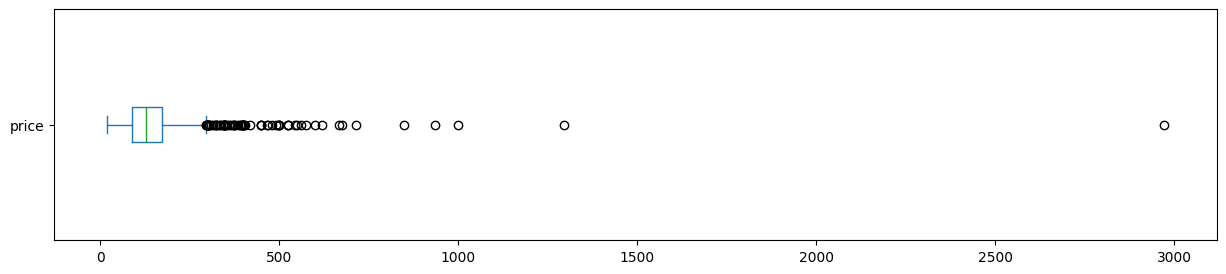

In [7]:
listings_zipado_df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

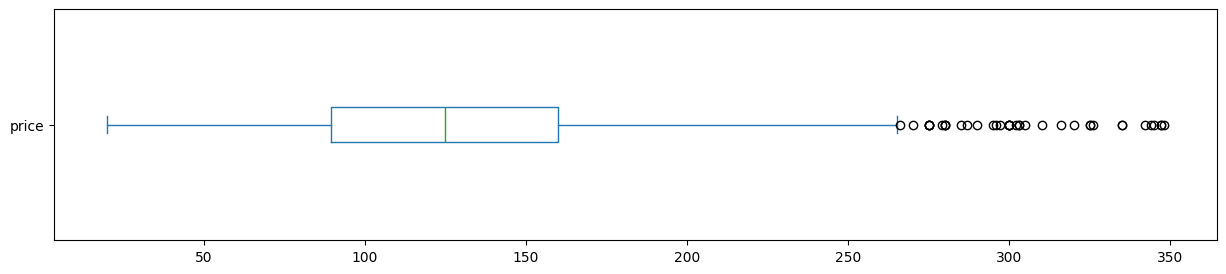

In [8]:
listings_zipado_df.price[listings_zipado_df.price < 350].plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

Distribuição do preço pela cidade

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


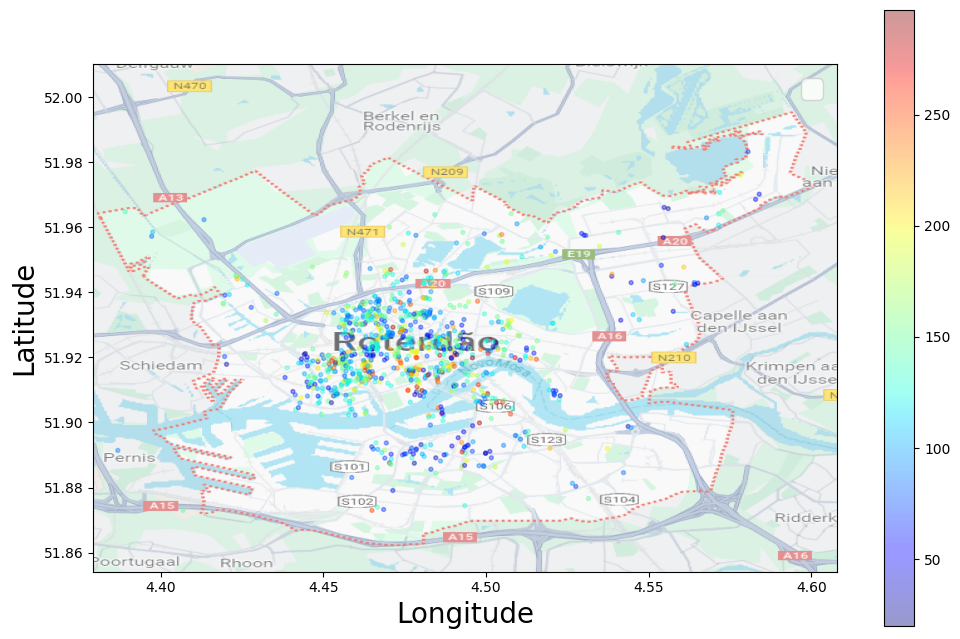

In [9]:
# importando a imagem
rottardam_map = mpimg.imread('Ficheiros_airbnb_Rotterdam/rottardam_map.png')

df_mapa = listings_zipado_df[listings_zipado_df['price'] < 300][['price','longitude', 'latitude']]

# plotando os dados do nosso DataFrame df_new, o qual removemos os outliers, e definir as cores de acordo com o preço
ax = df_mapa.plot(kind='scatter', x='longitude', y='latitude',
alpha=0.4, c=df_mapa['price'], s=8, cmap=plt.get_cmap('jet'),
figsize=(12,8));

# definindo as coordenadas dos extremos da imagem retirada do Google Maps
# a ordem é: Longitude do canto inferior esquerdo, longitude do superior direito, latitude do inferior esquerdo e latitude do superior direito
plt.imshow(rottardam_map, extent=[4.379184622427334, 4.60787004173257, 51.85411821554999, 52.010093074169326], alpha=0.7)

# adicionando os rótulos dos eixos
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)
# definindo os valores mínimos e máximos dos eixos, devem ser os mesmo que definimos acima

plt.xlim(4.379184622427334, 4.60787004173257)
plt.ylim(51.85411821554999, 52.010093074169326)

plt.legend(fontsize=20)
plt.show();

Teste T para 1 Amostra

In [10]:
'''
https://www.momondo.pt/hoteis/roterdao
O preço médio para hotéis Rotterdam é de 81 € por noite
'''

# Teste t para uma média
valor_referencia = 81
resultado_t_test = stats.ttest_1samp(listings_zipado_df['price'], valor_referencia)
    
print("Teste t para uma Média:")
print("Estatística t:", resultado_t_test.statistic)
print("Valor p:", resultado_t_test.pvalue)

alfa = 0.05
if resultado_t_test.pvalue <= alfa:
    print("Rejeita-se a hipótese nula, logo, a média é significativamente diferente de", valor_referencia)
else:
    print("Não se rejeita a hipótese nula, logo, a média não é significativamente diferente de", valor_referencia)

print("\nMedia real é de:", listings_zipado_df['price'].mean())


Teste t para uma Média:
Estatística t: 16.7698747580968
Valor p: 4.812028188387863e-56
Rejeita-se a hipótese nula, logo, a média é significativamente diferente de 81

Media real é de: 152.9653846153846


Teste T para Amostras Independetes

In [11]:
#Existe diferença entre o preço dos que são reserva imediata?

# Teste t para amostras independentes
grupo_f = listings_zipado_df[listings_zipado_df['instant_bookable'] == 'f']['price']
grupo_t = listings_zipado_df[listings_zipado_df['instant_bookable'] == 't']['price']

resultado_t_test_ind = stats.ttest_ind(grupo_t, grupo_f,equal_var=True)

print("Teste t para Amostras Independentes:")
print("Estatística t:", resultado_t_test_ind.statistic)
print("Valor p:", resultado_t_test_ind.pvalue)

alfa = 0.05
if resultado_t_test_ind.pvalue <= alfa:
    print("Rejeita-se a hipótese nula, logo, há diferença significativa entre as médias nos grupos.")
else:
    print("Não se rejeita a hipótese nula, logo, não há diferença significativa entre as médias nos grupos.")

print()
print("Media real grupo_f:", grupo_f.mean())
print("Media real grupo_t:", grupo_t.mean())


Teste t para Amostras Independentes:
Estatística t: 3.2626791486210083
Valor p: 0.001139617323527886
Rejeita-se a hipótese nula, logo, há diferença significativa entre as médias nos grupos.

Media real grupo_f: 146.05988023952096
Media real grupo_t: 181.09268292682927


teste de Leven

In [12]:
# Teste de Levene
resultado_teste_levene = stats.levene(grupo_f, grupo_t)

print("Teste de Levene:")
print("Estatística de Teste:", resultado_teste_levene.statistic)
print("Valor p:", resultado_teste_levene.pvalue)
print()

alfa = 0.05
if resultado_teste_levene.pvalue <= alfa:
    print("Rejeita-se a hipótese nula, logo, não há homogeneidade de variâncias.")
else:
    print("Não se rejeita a hipótese nula, logo, verifica-se homogeneidade de variâncias.")

Teste de Levene:
Estatística de Teste: 7.040485979937298
Valor p: 0.008090464074249907

Rejeita-se a hipótese nula, logo, não há homogeneidade de variâncias.


Welch

In [13]:
statistic, p_valor = stats.ttest_ind(grupo_f, grupo_t, equal_var=False)

print("Estatística do teste de Welch:", statistic)
print("Valor p do teste de Welch:", p_valor)
print()

alfa = 0.05
if resultado_teste_levene.pvalue <= alfa:
    print("Rejeita-se a hipótese nula, logo, há diferença significativa entre as médias.")
else:
    print("Não se rejeita a hipótese nula, médias podem ser consideradas estatisticamente iguais.")

Estatística do teste de Welch: -2.1532169466069426
Valor p do teste de Welch: 0.03236140272636369

Rejeita-se a hipótese nula, logo, há diferença significativa entre as médias.


intervelo de confiança

In [14]:
# intervalos de confiança
conf_level = 0.95  # Nível de confiança
conf_interval_sim = stats.norm.interval(conf_level, loc=np.mean(grupo_t), scale=stats.sem(grupo_t))
conf_interval_nao = stats.norm.interval(conf_level, loc=np.mean(grupo_f), scale=stats.sem(grupo_f))
## loc é o centro do intervalo de confiança e scale é o erro padrão da média (SEM)

print("Intervalo de Confiança a 95% para a média do tempo de utilização no grupo com intenção de uso:", conf_interval_sim)
print("Intervalo de Confiança a 95% para a média do tempo de utilização no grupo sem intenção de uso:", conf_interval_nao)

Intervalo de Confiança a 95% para a média do tempo de utilização no grupo com intenção de uso: (150.00807793394677, 212.17728791971177)
Intervalo de Confiança a 95% para a média do tempo de utilização no grupo sem intenção de uso: (138.94448234806129, 153.17527813098064)


Teste T para amostras Emparelhadas

In [15]:
'''
#grupo_t = listings_zipado_df[listings_zipado_df['instant_bookable'] == 't', ['price']['number_of_reviews']]
#grupo_f = listings_zipado_df[listings_zipado_df['instant_bookable'] == 'f', ['price']['number_of_reviews']][:len(grupo_t)]
'''

grupo_t = listings_zipado_df.loc[listings_zipado_df['instant_bookable'] == 't', ['price']]
grupo_f = listings_zipado_df.loc[listings_zipado_df['instant_bookable'] == 'f', ['price']][:len(grupo_t)]


estatistica_t, valor_p = stats.ttest_rel(grupo_f, grupo_t)
print("Estatística t:",estatistica_t)
print("Valor p:", valor_p)

print("\nA média T:", grupo_t.mean())
print("\nA média F:", grupo_f.mean())

# Interpretar os resultados (concluir a partir do valor p)
if valor_p <= 0.05:
    print("Houve diferença significativa entre as médias de desempenho antes e depois da alteração.")
else:
    print("Não houve diferença significativa entre as médias de desempenho antes e depois da alteração.")



Estatística t: [-2.85447456]
Valor p: [0.00475585]

A média T: price    181.092683
dtype: float64

A média F: price    131.297561
dtype: float64
Houve diferença significativa entre as médias de desempenho antes e depois da alteração.


ANova

In [16]:
# ANOVA para comparar as médias dos tempos de utilização nos 3 grupos definidos pelos Problemas Encontrados
grupo_Private_room_Anova = listings_zipado_df[listings_zipado_df['room_type'] == 'Private room']['number_of_reviews']
grupo_Shared_room_Anova = listings_zipado_df[listings_zipado_df['room_type'] == 'Shared room']['number_of_reviews']
grupo_Entire_home_apt_Anova = listings_zipado_df[listings_zipado_df['room_type'] == 'Entire home/apt']['number_of_reviews']
grupo_Hotel_room_Anova = listings_zipado_df[listings_zipado_df['room_type'] == 'Hotel room']['number_of_reviews']

grupos_teste = [grupo_Private_room_Anova, grupo_Shared_room_Anova, grupo_Entire_home_apt_Anova, grupo_Hotel_room_Anova]

resultado_anova = stats.f_oneway(*grupos_teste)

print("ANOVA (Análise de Variância):")
print("Estatística F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

alfa = 0.05
if resultado_anova.pvalue <= alfa:
    print("Rejeita-se a hipótese nula, logo, há pelo menos um grupo com média diferente das demais.")
else:
    print("Não se rejeita a hipótese nula, logo, não há diferença significativa nas médias nos grupos.")

ANOVA (Análise de Variância):
Estatística F: 9.202415070629476
Valor p: 5.195517376318418e-06
Rejeita-se a hipótese nula, logo, há pelo menos um grupo com média diferente das demais.


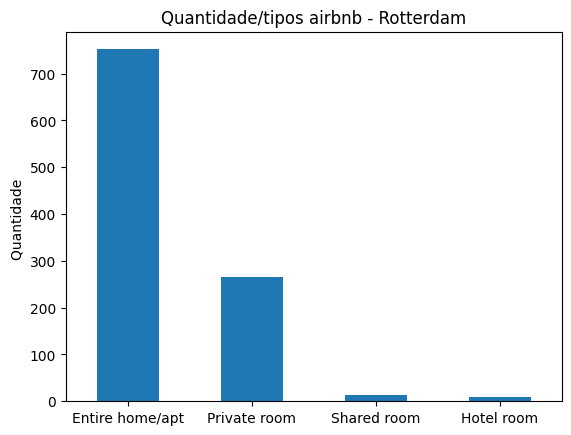

In [17]:
room_type=listings_zipado_df['room_type'].value_counts()

# Criando o gráfico de barras empilhadas
room_type.plot(kind='bar')
plt.xlabel('')
plt.ylabel('Quantidade ')
plt.title('Quantidade/tipos airbnb - Rotterdam')
plt.xticks(rotation=0)  # Para manter os rótulos das categorias na horizontal
plt.show()

Qui-Quadrado

In [18]:
# Teste do Qui-Quadrado para analisar associação entre Género e Problemas Encontrados
tabela_contingencia = pd.crosstab(listings_zipado_df['neighbourhood_cleansed'], listings_zipado_df['room_type'])
resultado_quiquadrado = stats.chi2_contingency(tabela_contingencia) 
# pode-se acrescentar correction=True se quiser Correção de Yates (recomendado para tabelas 2*2)

print(tabela_contingencia)
print("Teste do Qui-Quadrado:")
print("Estatística Qui-Quadrado:", resultado_quiquadrado.statistic)
print("Valor p:", resultado_quiquadrado.pvalue)

alfa = 0.05
if resultado_quiquadrado.pvalue <= alfa:
    print("\nRejeita-se a hipótese nula; portanto, existe associação entre os bairros e o tipo de quarto.")
else:
    print("\nNão se rejeita a hipótese nula; logo, não há evidências suficientes para afirmar uma associação significativa entre os bairros e o tipo de quarto nos dados analisados.")

    

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
's-Gravenland                         1           0             0            0
Afrikaanderwijk                       5           0             1            0
Agniesebuurt                          5           0            15            1
Bergpolder                           40           0             1            0
Blijdorp                             50           0             8            0
...                                 ...         ...           ...          ...
Vreewijk                              3           0             5            0
Zestienhoven                          4           0             0            0
Zevenkamp                             5           0             0            0
Zuiderpark                            1           0             3            0
Zuidwijk                              1           0 

Correlação -4

In [19]:
# Calculando a correlação de Pearson

correlacao_pearson = listings_zipado_df[['price','number_of_reviews']].corr(method='pearson')
print(correlacao_pearson)



                      price  number_of_reviews
price              1.000000          -0.102433
number_of_reviews -0.102433           1.000000


                      price  number_of_reviews
price              1.000000          -0.202079
number_of_reviews -0.202079           1.000000

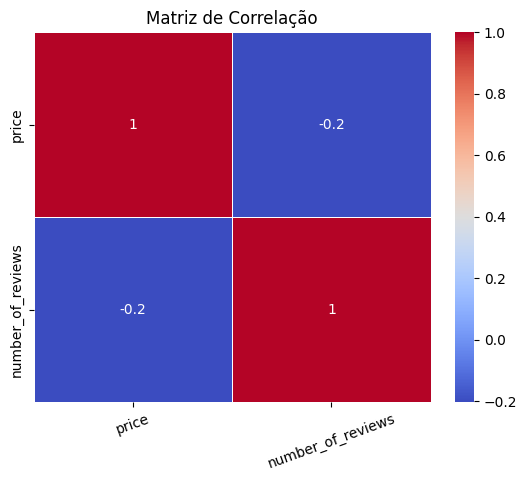

In [20]:
correlacao_spearman = listings_zipado_df[['price','number_of_reviews']].corr(method='spearman')
print(correlacao_spearman,end='')

# Criar um gráfico de matriz de correlação usando Seaborn
sns.heatmap(correlacao_spearman, annot=True, cmap='coolwarm', linewidths=0.5)  
plt.title('Matriz de Correlação')
plt.xticks(rotation=20)
plt.show()

Analise de Clusters

In [21]:
indicadores_Cluster = listings_zipado_df.groupby('neighbourhood_cleansed').agg({
    'price': 'mean',
    'number_of_reviews': 'mean',
    'review_scores_rating': 'mean',
    'review_scores_accuracy': 'mean',
    'review_scores_cleanliness': 'mean',
    'review_scores_checkin': 'mean',
    'review_scores_communication': 'mean',
    'review_scores_location': 'mean',
    'review_scores_value': 'mean'
}).dropna()

scaler = StandardScaler()
indicadores_scaled = scaler.fit_transform(indicadores_Cluster)

bairro=[]

for index in indicadores_Cluster.index:
    bairro.append(index)

indicadores_Cluster['neighbourhood_cleansed']=bairro


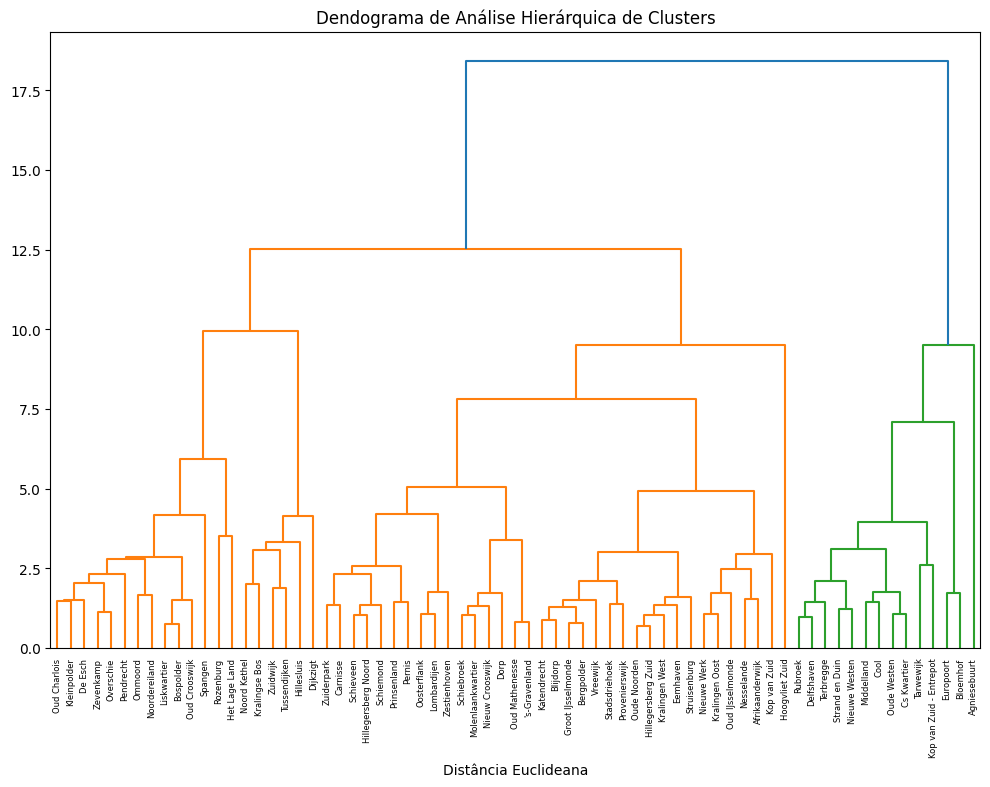

In [22]:
# Obter a matriz de dissemelhanças
linkage_matrix = linkage(indicadores_scaled, method='ward',metric='euclidean')

# Criar o dendograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending',labels=indicadores_Cluster.index,show_leaf_counts=True)
plt.title('Dendograma de Análise Hierárquica de Clusters')
plt.xlabel('Distância Euclideana')
plt.show()

In [23]:
cluster_labels4 = cut_tree(linkage_matrix, n_clusters=4)

cluster_labels4 = cluster_labels4.flatten() #converte a matriz de rótulos numa lista
count= np.bincount(cluster_labels4) #conta o número de observações em cada cluster
print(count)

[35 14 14  6]


In [24]:
indicadores_Cluster.loc[:, 'ClusterH4'] = cluster_labels4
indicadores_Cluster

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,neighbourhood_cleansed,ClusterH4
neighbourhood_cleansed,,,,,,,,,,,
's-Gravenland,110.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,'s-Gravenland,0
Afrikaanderwijk,221.000000,19.500000,4.898333,4.801667,4.860000,4.895000,4.925000,4.745000,4.761667,Afrikaanderwijk,0
Agniesebuurt,167.952381,15.333333,4.270556,4.399444,4.528889,4.474444,4.116111,4.508333,4.099444,Agniesebuurt,1
Bergpolder,127.048780,17.682927,4.829487,4.852564,4.653590,4.909487,4.914359,4.780256,4.663846,Bergpolder,0
Blijdorp,134.275862,22.758621,4.837500,4.863269,4.736923,4.899423,4.898269,4.863269,4.701346,Blijdorp,0
...,...,...,...,...,...,...,...,...,...,...,...
Vreewijk,116.625000,6.125000,4.800000,4.761429,4.741429,4.918571,4.937143,4.780000,4.598571,Vreewijk,0
Zestienhoven,141.500000,4.750000,4.856667,4.883333,4.580000,5.000000,4.933333,4.806667,4.713333,Zestienhoven,0
Zevenkamp,123.000000,35.800000,4.780000,4.803333,4.613333,4.906667,4.923333,4.570000,4.670000,Zevenkamp,2


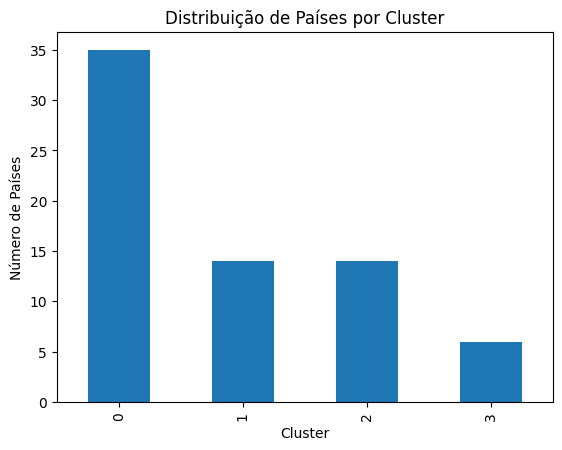

In [25]:
cluster_counts = indicadores_Cluster['ClusterH4'].value_counts().sort_index()
# Crie um gráfico de barras para mostrar a distribuição de observações por cluster
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Número de Países')
plt.title('Distribuição de Países por Cluster')
plt.show()

In [26]:
clustersH4 = indicadores_Cluster.groupby('ClusterH4')['neighbourhood_cleansed'].apply(list) 
for cluster, bairros in clustersH4.items():
    print(f'cluster {cluster}: {", ".join(bairros)}')


cluster 0: 's-Gravenland, Afrikaanderwijk, Bergpolder, Blijdorp, Carnisse, Dorp, Eemhaven, Groot IJsselmonde, Hillegersberg Noord, Hillegersberg Zuid, Hoogvliet Zuid, Katendrecht, Kop van Zuid, Kralingen Oost, Kralingen West, Lombardijen, Molenlaankwartier, Nesselande, Nieuw Crooswijk, Nieuwe Werk, Oosterflank, Oud IJsselmonde, Oud Mathenesse, Oude Noorden, Pernis, Prinsenland, Provenierswijk, Schiebroek, Schiemond, Schieveen, Stadsdriehoek, Struisenburg, Vreewijk, Zestienhoven, Zuiderpark
cluster 1: Agniesebuurt, Bloemhof, Cool, Cs Kwartier, Delfshaven, Europoort, Kop van Zuid - Entrepot, Middelland, Nieuwe Westen, Oude Westen, Rubroek, Strand en Duin, Tarwewijk, Terbregge
cluster 2: Bospolder, De Esch, Het Lage Land, Kleinpolder, Liskwartier, Noordereiland, Ommoord, Oud Charlois, Oud Crooswijk, Overschie, Pendrecht, Rozenburg, Spangen, Zevenkamp
cluster 3: Dijkzigt, Hillesluis, Kralingse Bos, Noord Kethel, Tussendijken, Zuidwijk


validação de clusters

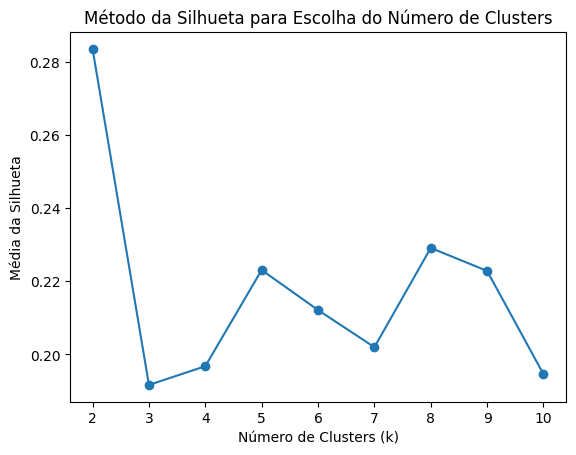

O número recomendado de clusters (k) é: 2


In [27]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(indicadores_scaled)
    silhouette_avg = silhouette_score(indicadores_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_k = k_values[silhouette_scores.index(max(silhouette_scores))] #encontra o k que maximiza o índice de silhueta

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Média da Silhueta')
plt.title('Método da Silhueta para Escolha do Número de Clusters')
plt.show()
print(f'O número recomendado de clusters (k) é: {best_k}')

In [28]:
kmeans = KMeans(n_clusters=2,random_state=42,n_init=10)
kmeans.fit(indicadores_scaled)
cluster_labels_km2 = kmeans.fit_predict(indicadores_scaled)

indicadores_Cluster.loc[:, 'ClusterKM2'] = cluster_labels_km2
contagens = indicadores_Cluster['ClusterKM2'].value_counts().sort_index()
print(contagens)

clusters = indicadores_Cluster.groupby('ClusterKM2')['neighbourhood_cleansed'].apply(list) 
for cluster, countries in clusters.items():
    print("\n"f'Cluster {cluster}: {", ".join(countries)}')
médias_clusterKM2 = indicadores_Cluster.groupby('ClusterKM2')
print(médias_clusterKM2)

ClusterKM2
0    46
1    23
Name: count, dtype: int64

Cluster 0: 's-Gravenland, Afrikaanderwijk, Bergpolder, Blijdorp, Carnisse, Dijkzigt, Dorp, Groot IJsselmonde, Hillegersberg Noord, Hillegersberg Zuid, Hoogvliet Zuid, Katendrecht, Kleinpolder, Kop van Zuid, Kralingen Oost, Kralingen West, Kralingse Bos, Lombardijen, Molenlaankwartier, Nesselande, Nieuw Crooswijk, Nieuwe Werk, Noord Kethel, Noordereiland, Oosterflank, Oud Charlois, Oud IJsselmonde, Oud Mathenesse, Oude Noorden, Overschie, Pendrecht, Pernis, Prinsenland, Provenierswijk, Schiebroek, Schiemond, Schieveen, Spangen, Stadsdriehoek, Struisenburg, Tussendijken, Vreewijk, Zestienhoven, Zevenkamp, Zuiderpark, Zuidwijk

Cluster 1: Agniesebuurt, Bloemhof, Bospolder, Cool, Cs Kwartier, De Esch, Delfshaven, Eemhaven, Europoort, Het Lage Land, Hillesluis, Kop van Zuid - Entrepot, Liskwartier, Middelland, Nieuwe Westen, Ommoord, Oud Crooswijk, Oude Westen, Rozenburg, Rubroek, Strand en Duin, Tarwewijk, Terbregge


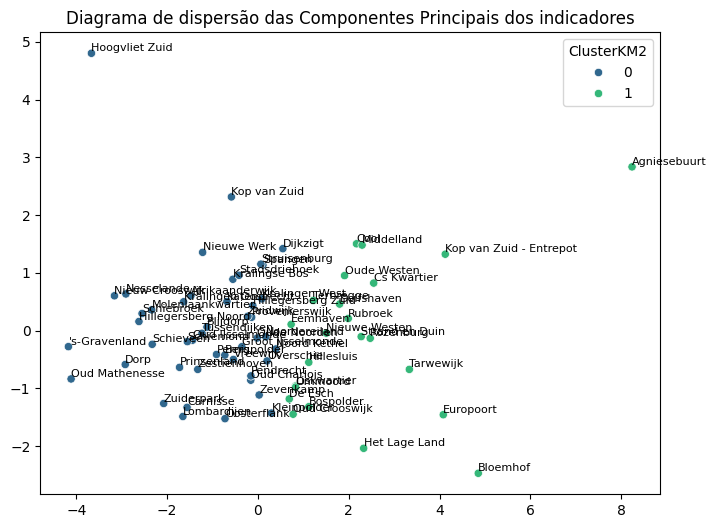

In [29]:
# Aplicar Análise de Componentes Principais para reduzir para duas dimensões
pca = PCA(n_components=2)
indicadores_pca = pca.fit_transform(indicadores_scaled)

# Representar graficamente, com cores diferentes por cluster
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=indicadores_pca[:, 0], y=indicadores_pca[:, 1],
                           hue=indicadores_Cluster['ClusterKM2'], palette='viridis', legend='full')
# Adicionar os nomes dos países como rótulos dos pontos
for i, país in enumerate(indicadores_Cluster['neighbourhood_cleansed']):
    scatter.text(indicadores_pca[i, 0], indicadores_pca[i, 1], país, fontsize=8, ha='left', va='bottom')
plt.title('Diagrama de dispersão das Componentes Principais dos indicadores')
plt.show()

Regressão Linear

In [30]:
#Variavel Dependente: Quantitativa (Preço ou score)
#Variavel Independente: Qualitativa (quali ou quanti em dumi)
df_reg = listings_zipado_df[listings_zipado_df['price'] < 350][['avaliacao', 'price']]
df_reg = df_reg.dropna()

#variaveis independentes
X = df_reg['avaliacao']

#variavel dependente
y = df_reg['price']

In [31]:
X_1 = sm.add_constant(X)

model = sm.OLS(y, X_1).fit()
print(model.summary())

#R-squared e Adj. R-squared: valores são muito baixos, o modelo não explica bem a variação nos preços

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05620
Date:                Mon, 22 Jan 2024   Prob (F-statistic):              0.813
Time:                        17:04:10   Log-Likelihood:                -4301.8
No. Observations:                 781   AIC:                             8608.
Df Residuals:                     779   BIC:                             8617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.1863     33.768      3.618      0.0

In [32]:
# Calcular os resíduos
residuals = model.resid

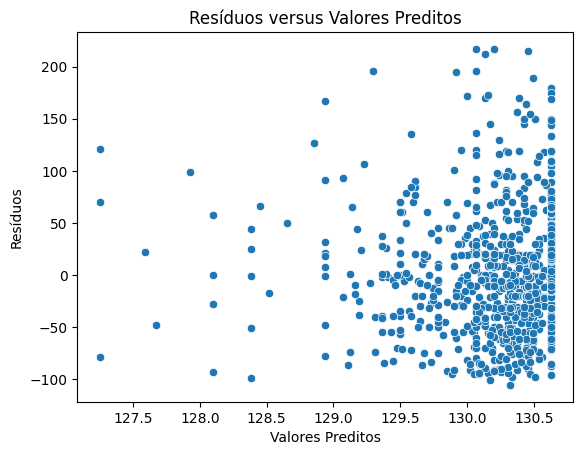

In [33]:
# 1.Linearidade e homocedasticidade (resíduos versus preditos)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.title('Resíduos versus Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

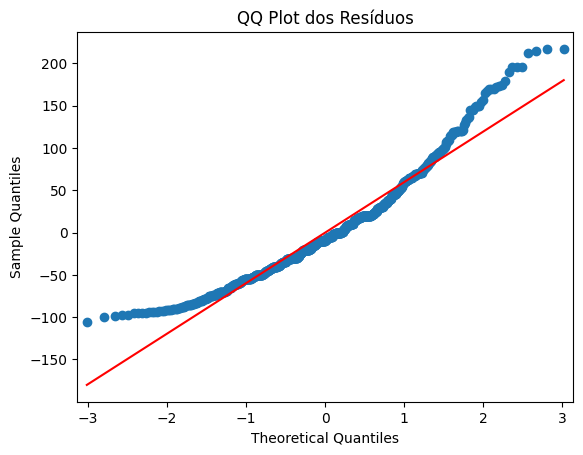

Teste de Shapiro-Wilk - Estatística: 0.9472918510437012, Valor p: 4.601597542000816e-16


In [34]:
# 2. Normalidade dos resíduos (QQ Plot e Teste de Shapiro-Wilk)
sm.qqplot(residuals, line='s')
plt.title('QQ Plot dos Resíduos')
plt.show()
# Teste de Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f'Teste de Shapiro-Wilk - Estatística: {stat}, Valor p: {p_value}')

Regressão linear múltipla utilizando o sklearn

In [35]:
X = X.to_numpy().reshape(-1, 1)

# Dividir os dados em amostras de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um objeto de regressão linear
regr = LinearRegression()

# Treinar o modelo usando a amostra de treino
regr.fit(X_train, y_train)

# Fazer previsões usando a amostra de teste
y_pred = regr.predict(X_test)

# O erro quadrático médio (MSE=Mean Squared Error)
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
# Raiz do erro quadrático médio (RMSE=Root Mean Squared Error) 
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))

# O coeficiente de determinação: 
print('Coeficiente de determinação:', r2_score(y_test, y_pred))

MSE: 3615.34
RMSE: 60.13
Coeficiente de determinação: -0.006356524913590844


Validação Cruzada

In [36]:
# Criar um objeto de regressão linear
regr = LinearRegression()

# Realizar a validação cruzada
R2 = cross_val_score(regr, X, y, cv=5)

print('Scores de validação cruzada: ', R2)
print('Média dos scores de validação cruzada: ', R2.mean())

Scores de validação cruzada:  [-7.66118192e-02  9.70429300e-05 -5.71067494e-02 -1.68969228e-02
 -2.02570330e-02]
Média dos scores de validação cruzada:  -0.034155096288270445


Regressão Logistica

In [37]:
#Variavel Dependente
#Variavel Independente


df_clean = listings_zipado_df[['price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable','room_type', 'host_response_time']].dropna()

df_clean['instant_bookable'] = df_clean['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

df_clean=pd.DataFrame(df_clean)

# Variáveis
X = df_clean.drop('instant_bookable', axis=1)
y = df_clean['instant_bookable']

# Garantir que X e y tenham o mesmo número de amostras
X = X[:len(y)]

# Dividir os dados em amostra de treino e amostra de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [38]:

logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
nn_model = MLPClassifier(random_state=42,hidden_layer_sizes=(100, 50, 25, 12))

models = [logistic_model, tree_model, forest_model, knn_model, nn_model]
model_names = ['Regressão Logística', 'Árvore de Classificação', 'Random Forest', 'kNN', 'Rede Neuronal']


In [39]:

# Pré-processamento para variáveis quantitativas
quantitative_features = ['price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
scaler = StandardScaler()

# Pré-processamento para variáveis qualitativas
qualitative_features = ['room_type', 'host_response_time']
one_hot_encoder = OneHotEncoder(drop='first')  # Drop the first category

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, quantitative_features),
        ('cat', one_hot_encoder, qualitative_features)
    ]
)

# Criar pipelines para cada modelo
pipelines = []
for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipelines.append(pipeline)
 

Modelo: Regressão Logística
Acurácia: 0.88
Especificidade: 0.97
Sensibilidade: 0.30
AUC: 0.89
Matriz de confusão:
[[64  2]
 [ 7  3]]

Modelo: Árvore de Classificação
Acurácia: 0.75
Especificidade: 0.77
Sensibilidade: 0.60
AUC: 0.68
Matriz de confusão:
[[51 15]
 [ 4  6]]



Modelo: Random Forest
Acurácia: 0.88
Especificidade: 0.95
Sensibilidade: 0.40
AUC: 0.84
Matriz de confusão:
[[63  3]
 [ 6  4]]

Modelo: kNN
Acurácia: 0.83
Especificidade: 0.91
Sensibilidade: 0.30
AUC: 0.80
Matriz de confusão:
[[60  6]
 [ 7  3]]



c:\Users\Rafae\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo: Rede Neuronal
Acurácia: 0.88
Especificidade: 0.94
Sensibilidade: 0.50
AUC: 0.85
Matriz de confusão:
[[62  4]
 [ 5  5]]



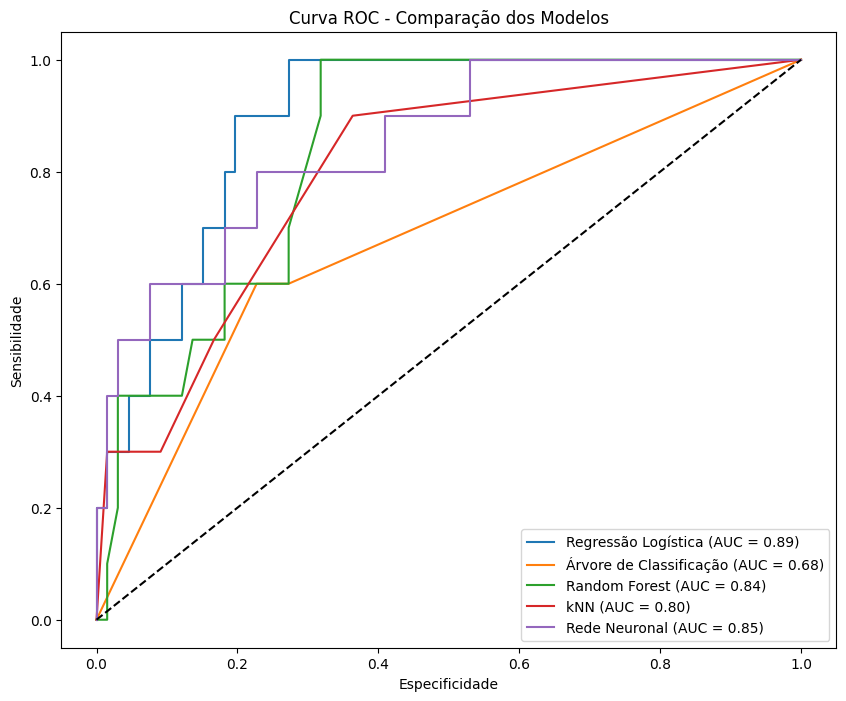

In [40]:
# Ajustar os modelos e avaliar o desempenho
plt.figure(figsize=(10, 8))

for pipeline, name in zip(pipelines, model_names):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Métricas de desempenho
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    print(f'Modelo: {name}')
    print(f'Acurácia: {accuracy:.2f}')
    print(f'Especificidade: {specificity:.2f}')
    print(f'Sensibilidade: {sensitivity:.2f}')
    print(f'AUC: {auc:.2f}')
    print(f'Matriz de confusão:\n{cm}\n')
    
    # Curva ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC - Comparação dos Modelos')
plt.legend(loc='best')
plt.show() # Métricas de desempenho

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)


DashBoard

In [42]:
bairros_df = listings_zipado_df.groupby('neighbourhood_cleansed')['price'].mean().reset_index(name='price')
bairros_df = bairros_df.sort_values(by='price', ascending=False)

app = Dash(__name__)

df = bairros_df

fig = px.bar(bairros_df, x=bairros_df['neighbourhood_cleansed'], y=bairros_df['price'], barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Preço por bairro'),

    html.Div(children='''
       
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline', port=8000)

In [43]:
bairro_room_type = listings_zipado_df.groupby(['room_type']).size().reset_index(name='count')

bairro_room_type = bairro_room_type.sort_values(by='count', ascending=False)


app = Dash(__name__)

df = bairro_room_type

fig = px.bar(df, x=bairro_room_type['room_type'], y=bairro_room_type['count'], barmode="group")

fig2 = px.pie(df, values='count', names='room_type', title='Ver que tipos de alugueres existem')


app.layout = html.Div(children=[
    html.H1(children='Room Type'),

    html.Div(children='''
        Ver que tipos de alugueres existem
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    ),

    dcc.Graph(
        id='example2-graph',
        figure=fig2
    )
])


app.run_server(mode='inline', port=8001)

In [44]:
bairro_room_type = listings_zipado_df.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

app = Dash(__name__)

df = bairro_room_type

fig = px.bar(df, x=bairro_room_type['neighbourhood_cleansed'], y=bairro_room_type['count'], color=bairro_room_type['room_type'], barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Room_Type'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline', port=8004)

In [45]:
bairro_room_type = bairro_room_type.head(25)


from dash import Dash, html, dcc
import plotly.express as px

app = Dash(__name__)

df = bairro_room_type


fig = px.bar(df, x=bairro_room_type['neighbourhood_cleansed'], y=bairro_room_type['count'], color=bairro_room_type['room_type'], barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Room_Type'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

app.run_server(mode='inline', port=8005)



In [46]:
dash_line = listings_zipado_df[['neighbourhood_cleansed', 'price', 'avaliacao']].dropna()

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Visualização interativa do scatter com o dataset Insurance'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filtro por neighbourhood:"),
    html.Label([
        "neighbourhood",
        dcc.Dropdown(
            id='neighbourhood-dropdown', clearable=False,
            value='all', options=[
                {'label': c, 'value': c} for c in np.append(dash_line.neighbourhood_cleansed.unique(),['all'])
            ])
    ]),
])

# Define callback to update graph
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input("neighbourhood-dropdown", "value")]
)
def update_figure(neighbourhood):
    if neighbourhood == 'all':  
        df_grp = dash_line.groupby(by=['neighbourhood_cleansed']).mean()
    else:
        df_grp = dash_line[dash_line.neighbourhood_cleansed == neighbourhood]

    return px.scatter(x=df_grp.avaliacao, y=df_grp.price,  trendline="ols", \
                 labels={'x':'avaliacao', 'y':'price', 'color': 'Filhos'})

app.run_server(mode='inline')

In [47]:
# importando a imagem

df_mapa = listings_zipado_df[listings_zipado_df['price'] < 300][['price','longitude', 'latitude','neighbourhood_cleansed']]

fig = px.scatter_mapbox(df_mapa, lat="latitude", lon="longitude", hover_name="neighbourhood_cleansed",
                        zoom=12, height=500, color='price')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()